<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-and-prepare-data" data-toc-modified-id="Load-and-prepare-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load and prepare data</a></span></li><li><span><a href="#Segmentation-into-microstates" data-toc-modified-id="Segmentation-into-microstates-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Segmentation into microstates</a></span></li><li><span><a href="#GMD-computation" data-toc-modified-id="GMD-computation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>GMD computation</a></span></li><li><span><a href="#Backfitting-segmentation-on-each-epoch-of-each-subject" data-toc-modified-id="Backfitting-segmentation-on-each-epoch-of-each-subject-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Backfitting segmentation on each epoch of each subject</a></span></li></ul></div>

In [1]:
import sys
import glob, os

import numpy as np
from matplotlib import pyplot as plt

import pandas as pd
import seaborn as sns

import mne

sys.path.insert(0, os.path.abspath('../pycrostates'))
import pycrostates

from pycrostates.cluster import AAHCluster


## Load and prepare data

In [2]:
# List of all subject file paths
data_files = glob.glob('./data/own_name_revcor_preprocessedEEG_subj_*.fif')

subj_id = pd.DataFrame(columns=['subj'])
all_subjects_epochs = []
# Load each file and append the epoch object to a list
epoch_list = []
for eeg_file in data_files:
    subject_epochs = mne.read_epochs(eeg_file)
    subject_epochs = subject_epochs['deviant']
    
    # Extract subject number
    subject_number = eeg_file.split('/')[-1].split('.')[0][-4:]
    subj_id['subj'] = subject_number
    
    # Create a new metadata dataframe with subject IDs
    subj_list = [int(subject_number) for i in range(1, len(subject_epochs)+1)]
    df = pd.DataFrame({'subj': subj_list})

    # Add the metadata to the epochs data
    subject_epochs.metadata = df

    all_subjects_epochs.append(subject_epochs);

Reading G:\WORK\own-name-revcor\data\own_name_revcor_preprocessedEEG_subj_0006.fif ...


G:\Utilisateurs\c.joucla\AppData\Local\Temp\ipykernel_15112\1575029243.py:9: RuntimeWarning: This filename (./data\own_name_revcor_preprocessedEEG_subj_0006.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  subject_epochs = mne.read_epochs(eeg_file)


    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =    -100.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
1369 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Adding metadata with 1 columns
Reading G:\WORK\own-name-revcor\data\own_name_revcor_preprocessedEEG_subj_0007.fif ...
    Read a total of 1 projection items:


G:\Utilisateurs\c.joucla\AppData\Local\Temp\ipykernel_15112\1575029243.py:9: RuntimeWarning: This filename (./data\own_name_revcor_preprocessedEEG_subj_0007.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  subject_epochs = mne.read_epochs(eeg_file)


        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =    -100.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
1494 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Adding metadata with 1 columns
Reading G:\WORK\own-name-revcor\data\own_name_revcor_preprocessedEEG_subj_0011.fif ...
    Read a total of 1 projection items:


G:\Utilisateurs\c.joucla\AppData\Local\Temp\ipykernel_15112\1575029243.py:9: RuntimeWarning: This filename (./data\own_name_revcor_preprocessedEEG_subj_0011.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  subject_epochs = mne.read_epochs(eeg_file)


        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =    -100.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
1493 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Adding metadata with 1 columns
Reading G:\WORK\own-name-revcor\data\own_name_revcor_preprocessedEEG_subj_0012.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active


G:\Utilisateurs\c.joucla\AppData\Local\Temp\ipykernel_15112\1575029243.py:9: RuntimeWarning: This filename (./data\own_name_revcor_preprocessedEEG_subj_0012.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  subject_epochs = mne.read_epochs(eeg_file)


    Found the data of interest:
        t =    -100.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
1473 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Adding metadata with 1 columns
Reading G:\WORK\own-name-revcor\data\own_name_revcor_preprocessedEEG_subj_0015.fif ...
    Read a total of 1 projection items:


G:\Utilisateurs\c.joucla\AppData\Local\Temp\ipykernel_15112\1575029243.py:9: RuntimeWarning: This filename (./data\own_name_revcor_preprocessedEEG_subj_0015.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  subject_epochs = mne.read_epochs(eeg_file)


        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =    -100.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
1500 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Adding metadata with 1 columns
Reading G:\WORK\own-name-revcor\data\own_name_revcor_preprocessedEEG_subj_0016.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =    -100.00 ...     600.00 ms
        0 CTF compensation matrices available


G:\Utilisateurs\c.joucla\AppData\Local\Temp\ipykernel_15112\1575029243.py:9: RuntimeWarning: This filename (./data\own_name_revcor_preprocessedEEG_subj_0016.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  subject_epochs = mne.read_epochs(eeg_file)


Not setting metadata
1160 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Adding metadata with 1 columns
Reading G:\WORK\own-name-revcor\data\own_name_revcor_preprocessedEEG_subj_0017.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:


G:\Utilisateurs\c.joucla\AppData\Local\Temp\ipykernel_15112\1575029243.py:9: RuntimeWarning: This filename (./data\own_name_revcor_preprocessedEEG_subj_0017.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  subject_epochs = mne.read_epochs(eeg_file)


        t =    -100.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
1452 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Adding metadata with 1 columns
Reading G:\WORK\own-name-revcor\data\own_name_revcor_preprocessedEEG_subj_0018.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active


G:\Utilisateurs\c.joucla\AppData\Local\Temp\ipykernel_15112\1575029243.py:9: RuntimeWarning: This filename (./data\own_name_revcor_preprocessedEEG_subj_0018.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  subject_epochs = mne.read_epochs(eeg_file)


    Found the data of interest:
        t =    -100.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
1335 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Adding metadata with 1 columns
Reading G:\WORK\own-name-revcor\data\own_name_revcor_preprocessedEEG_subj_0019.fif ...
    Read a total of 1 projection items:


G:\Utilisateurs\c.joucla\AppData\Local\Temp\ipykernel_15112\1575029243.py:9: RuntimeWarning: This filename (./data\own_name_revcor_preprocessedEEG_subj_0019.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  subject_epochs = mne.read_epochs(eeg_file)


        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =    -100.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
1479 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Adding metadata with 1 columns
Reading G:\WORK\own-name-revcor\data\own_name_revcor_preprocessedEEG_subj_0020.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:


G:\Utilisateurs\c.joucla\AppData\Local\Temp\ipykernel_15112\1575029243.py:9: RuntimeWarning: This filename (./data\own_name_revcor_preprocessedEEG_subj_0020.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  subject_epochs = mne.read_epochs(eeg_file)


        t =    -100.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
1428 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Adding metadata with 1 columns


In [3]:
# List to store evoked responses for each subject
all_subjects_evoked = []

# Loop over the epochs for each subject and compute the evoked response for the 'deviant' event
for subject_epochs in all_subjects_epochs:
    subject_evoked = subject_epochs['deviant'].average()
    all_subjects_evoked.append(subject_evoked)


In [4]:
# Compute the grand average of all subjects
grand_average = mne.grand_average(all_subjects_evoked)


Identifying common channels ...


Projections have already been applied. Setting proj attribute to True.


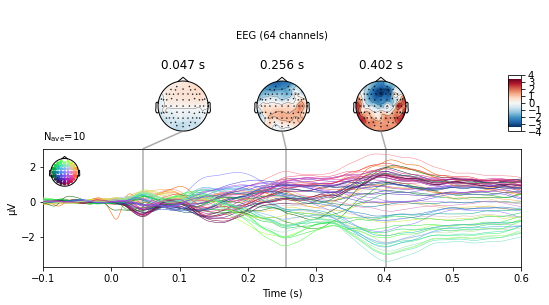

In [5]:
grand_average.copy().plot_joint();

In [6]:
# Convert Evoked object to Raw object for segmentation
df = pd.DataFrame(grand_average.data.T, columns=grand_average.ch_names)
raw_average = mne.io.RawArray(df.values.T, grand_average.info)

Creating RawArray with float64 data, n_channels=64, n_times=701
    Range : 0 ... 700 =      0.000 ...     0.700 secs
Ready.


## Segmentation into microstates

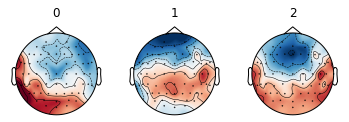

In [7]:
# Clustering grand average into 3 clusters using AAHC algorithm
AAHC = AAHCluster(n_clusters=3, normalize_input=True)
AAHC.fit(raw_average)
f = AAHC.plot()
# f.savefig('G:/Conférences et interventions/2023-05-15 Séminaire - Marseille - Revcor EEG/microstates.pdf')


In [8]:
AAHC._cluster_centers_

array([[-0.07314498, -0.12450055, -0.0712764 , -0.03546554,  0.1793244 ,
        -0.01094197, -0.12191306, -0.00244171,  0.11184951,  0.27973599,
         0.11885401, -0.01978737,  0.05082893,  0.15116606,  0.23146112,
         0.22178382,  0.19059527,  0.13773586,  0.0715088 ,  0.00193313,
        -0.09636512,  0.03047635, -0.02193653, -0.03113441, -0.11305853,
        -0.14902754, -0.15508589, -0.143059  , -0.09937033, -0.19252436,
        -0.10160634, -0.07468187, -0.10794777, -0.11073008, -0.09738118,
        -0.02969194,  0.08427545, -0.08435323, -0.06162679,  0.04983575,
         0.07438376,  0.1702967 ,  0.06711972,  0.1347473 ,  0.20840394,
         0.20466799,  0.21353498,  0.16475126,  0.15034725,  0.05709827,
         0.0553528 ,  0.01306534,  0.0096778 , -0.06635063, -0.09277934,
        -0.04615024, -0.10996833, -0.18905821, -0.16010364, -0.17615847,
        -0.11092776, -0.07898903, -0.10259224, -0.17268121],
       [-0.28694902, -0.14730674, -0.15819475, -0.18553468, -0.

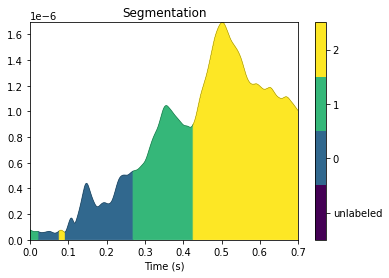

In [9]:
# AAHC.reorder_clusters(order=[0,1,2])

segmentation = AAHC.predict(
    raw_average,
    reject_by_annotation=True,
    factor=10,
    half_window_size=10,
    min_segment_length=5,
    reject_edges=False)

segmentation.plot()
plt.show()

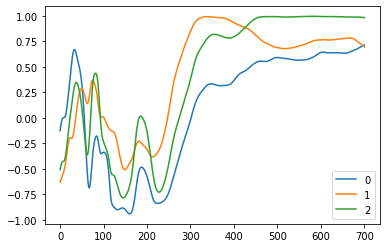

In [9]:
d=segmentation.compute_parameters()
plt.plot(d['0_all_corr'], label='0')
plt.plot(d['1_all_corr'], label='1')
plt.plot(d['2_all_corr'], label='2')
plt.legend()

In [10]:
microstates_times = segmentation.labels

In [15]:
microstates_times[100:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

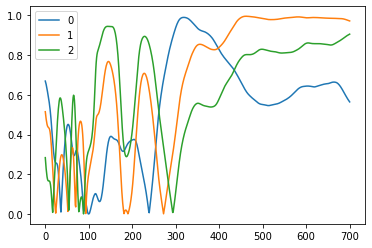

In [39]:
d=segmentation.compute_parameters()
plt.plot(np.abs(d['0_all_corr']), label='0')
plt.plot(np.abs(d['1_all_corr']), label='1')
plt.plot(np.abs(d['2_all_corr']), label='2')
plt.legend()

## GMD computation

In [28]:
def compute_GMD(data, microstate):
    # Normalize eeg

    # Compute GMD
    microstate = np.reshape(microstate, (microstate.shape[0], 1))
    microstate_rep = np.repeat(microstate, data.shape[1], axis = 1)
    GMD = np.sqrt(np.mean(np.square(data - microstate_rep), axis=0))
    GMD = np.reshape(GMD, (GMD.shape[0], 1))
    return GMD

In [32]:
all_microstates_GMD.shape

(470371, 4)

In [33]:
all_subjects_microstates = pd.DataFrame()
num = 0
subject_epochs = all_subjects_epochs[0]
# for num, subject_epochs in enumerate(all_subjects_epochs):
    
# Extract the event IDs
event_ids = subject_epochs.events[:, 2]

# Count the number of deviant events
n_deviant = sum(event_ids == subject_epochs.event_id['deviant'])

########## Compute GMD ##########
# Reshaping eeg data from 3d matrix (trials x channels x time) to 2d matrix (channels, time x trials)
data_eeg = subject_epochs.pick_types(eeg=True).get_data()
trials, channels, time = data_eeg.shape

# Transpose the data to have time as the second dimension
transposed_data = np.transpose(data_eeg, (1, 2, 0))

# Reshape the transposed data into a 2D matrix
reshaped_data = np.reshape(transposed_data, (channels, time * trials))

all_microstates_GMD = []
all_microstates_GMD = np.reshape(all_microstates_GMD, (GMD.shape[0], 1))
for ii in range(AAHC._cluster_centers_.shape[0]):
    GMD = compute_GMD(reshaped_data, AAHC._cluster_centers_[ii, :]) 
    GMD = np.reshape(GMD, (GMD.shape[0], 1))
    all_microstates_GMD = np.concatenate((all_microstates_GMD, GMD), axis=1)


ValueError: cannot reshape array of size 0 into shape (470371,1)

In [40]:
all_subjects_microstates = pd.DataFrame()

for num, subject_epochs in enumerate(all_subjects_epochs):
    
    # Extract the event IDs
    event_ids = subject_epochs.events[:, 2]

    # Count the number of deviant events
    n_deviant = sum(event_ids == subject_epochs.event_id['deviant'])
    
    ########## Compute GMD ##########
    # Reshaping eeg data from 3d matrix (trials x channels x time) to 2d matrix (channels, time x trials)
    data_eeg = subject_epochs.pick_types(eeg=True).get_data()
    trials, channels, time = data_eeg.shape

    # Transpose the data to have time as the second dimension
    transposed_data = np.transpose(data_eeg, (1, 2, 0))

    # Reshape the transposed data into a 2D matrix
    reshaped_data = np.reshape(transposed_data, (channels, time * trials))
    
    all_microstates_GMD = []
    for ii in range(AAHC._cluster_centers_.shape[0]):
        GMD = compute_GMD(reshaped_data, AAHC._cluster_centers_[ii, :]) 
        all_microstates_GMD = np.concatenate(all_microstates_GMD, GMD, axis=0)
    
    
    
    # Create a list of dataframes for each epoch
    df_list = []
    for epoch in range(n_deviant):
        epoch_data = []
        for key in results.keys():
            # Extract the epoch data for each key
            epoch_data.append(results[key][epoch])

        # Concatenate the epoch data into a dataframe
        epoch_df = pd.DataFrame(epoch_data).T
        epoch_df.columns = list(results.keys())

        # Add time data to the 'time' column
        epoch_df['time'] = list(range(-100, 601))
        epoch_df['epoch'] = epoch
        epoch_df['micro_labels'] = microstates_times
        
        # Adding subject number
        epoch_df['subject_number'] = subject_epochs.metadata['subj'].iloc[0]

        # Append the epoch dataframe to the list
        df_list.append(epoch_df)

    # Concatenate the epoch dataframes into a single dataframe
    df = pd.concat(df_list, ignore_index=True)
    
    %reset_selective -f regex results
    all_subjects_microstates = pd.concat([all_subjects_microstates, df], axis=0)
all_subjects_microstates.rename(columns={'0_all_corr': 'microstate_1', 
                                         '1_all_corr': 'microstate_2', 
                                         '2_all_corr':'microstate_3'}, inplace=True)

## Backfitting segmentation on each epoch of each subject

In [59]:
all_subjects_microstates = pd.DataFrame()
microstates_times = segmentation.labels
num = 0
subject_epochs = all_subjects_epochs[0]

# for num, subject_epochs in enumerate(all_subjects_epochs):

# Extract the event IDs
event_ids = subject_epochs.events[:, 2]

# Count the number of deviant events
n_deviant = sum(event_ids == subject_epochs.event_id['deviant'])

# Backfit segmentation on each epoch of each subject
segmentation = AAHC.predict(subject_epochs,
                            reject_by_annotation=True,
                            factor=10,
                            half_window_size=10,
                            min_segment_length=5,
                            reject_edges=False)

# Compute correlations between maps at each time point and each microstate
results = segmentation.compute_parameters()

# Removing unnecessary metrics from dict
my_list = ['mean_corr', 'gev', 'occurrences', 'timecov', 'meandurs', 'unlabeled']
for key in list(results.keys()):
    if any(substring in key for substring in my_list):
        results.pop(key)

# k for keys and v for values
results = {k: v.reshape(701, -1).T for k, v in results.items()}

# Create a list of dataframes for each epoch
df_list = []
for epoch in range(n_deviant):
    epoch_data = []
    for key in results.keys():
        # Extract the epoch data for each key
        epoch_data.append(results[key][epoch])

    # Concatenate the epoch data into a dataframe
    epoch_df = pd.DataFrame(epoch_data).T
    epoch_df.columns = list(results.keys())

    # Add time data to the 'time' column
    epoch_df['time'] = list(range(-100, 601))
    epoch_df['epoch'] = epoch
    epoch_df['micro_labels'] = microstates_times

    # Adding subject number
    epoch_df['subject_number'] = subject_epochs.metadata['subj'].iloc[0]

    # Append the epoch dataframe to the list
    df_list.append(epoch_df)

# Concatenate the epoch dataframes into a single dataframe
df = pd.concat(df_list, ignore_index=True)

%reset_selective -f regex results
all_subjects_microstates = pd.concat([all_subjects_microstates, df], axis=0)
all_subjects_microstates.rename(columns={'0_all_corr': 'microstate_1', 
                                     '1_all_corr': 'microstate_2', 
                                     '2_all_corr':'microstate_3'}, inplace=True)

ValueError: Length of values (671) does not match length of index (701)

In [41]:
all_subjects_microstates.to_csv('python_microstates.csv')